# Import Libraries

In [93]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import tools for model training and tuning
from sklearn.model_selection import train_test_split, GridSearchCV

# Import tool for feature scaling
from sklearn.preprocessing import StandardScaler

# Import machine learning model
from sklearn.ensemble import RandomForestClassifier

# Import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc


# Load DataFrame

In [95]:
# Load the dataset into a DataFrame
df = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")

## Initial Data Inspection

In [96]:
# Display the first 5 rows, summary info, and dataset dimensions
print("First 5 rows of the dataset:")
print(df.head())

print("\nConcise summary of the dataset:")
df.info()

print("\nDimensions of the dataset:")
print(df.shape)

First 5 rows of the dataset:
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  

Concise summary of the dataset:
<class 'pandas.core.frame.DataF

### Initial Data Inspection Summary

Based on the `df.head()`, `df.info()`, and `df.shape` outputs, here are the initial observations:

*   **Dataset Dimensions**: The dataset contains 5000 rows and 14 columns.
*   **Data Types**: Most columns are of integer (`int64`) type, except for `CCAvg` which is a float (`float64`).
*   **Missing Values**: There are no missing values across any of the columns, as indicated by `5000 non-null` for all columns in `df.info()`.
*   **Columns Overview**:
    *   `ID` and `ZIP Code` are identifiers and might not be directly useful for modeling; they may need to be dropped.
    *   `Age`, `Experience`, `Income`, `CCAvg`, and `Mortgage` appear to be numerical features.
    *   `Family`, `Education`, `Personal Loan`, `Securities Account`, `CD Account`, `Online`, and `CreditCard` appear to be categorical or binary features. `Personal Loan` is the target variable.

## Handle Missing Values

In [97]:
# Check for missing values in each column
print("Sum of missing values per column:")
print(df.isnull().sum())

Sum of missing values per column:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


### Missing Values Analysis Summary

The check using `df.isnull().sum()` confirms that there are **no missing values** across any of the columns in the dataset. This aligns with the initial observation from `df.info()` and ensures that no imputation or special handling for missing data is required for this dataset.

## Descriptive Statistics

In [98]:
# Display descriptive statistics for numerical columns
print("Descriptive statistics for numerical columns:")
print(df.describe())

# Display value counts and normalized frequencies for categorical and binary columns
categorical_binary_cols = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

print("\nDescriptive statistics for categorical and binary columns:")
for col in categorical_binary_cols:
    print(f"\n--- Column: {col} ---")
    print("Value Counts:")
    print(df[col].value_counts())
    print("\nNormalized Frequencies:")
    print(df[col].value_counts(normalize=True))

Descriptive statistics for numerical columns:
                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101

### Descriptive Statistics Summary

Based on the `df.describe()` output and the value counts for categorical/binary columns, here are the key insights:

**Numerical Columns:**

*   **ID**: Ranges from 1 to 5000, indicating a unique identifier for each customer. It has no predictive power and should be dropped.
*   **Age**: Ranges from 23 to 67 years, with a mean of approximately 45.3 years. The distribution appears relatively balanced.
*   **Experience**: Ranges from -3 to 43 years. The minimum value of -3 years is anomalous, as experience cannot be negative. This requires cleaning.
*   **Income**: Ranges from 8 to 224 (in thousands of dollars), with a mean of approximately 73.8. There's a wide range, suggesting potential outliers or a skewed distribution.
*   **ZIP Code**: This is an identifier and not a numerical feature in terms of predictive modeling. It should be dropped along with `ID`.
*   **CCAvg** (Average Credit Card Spending): Ranges from 0.0 to 10.0, with a mean of 1.94. This also shows a wide range, indicating variability in spending habits.
*   **Mortgage**: Ranges from 0 to 635. A significant portion of customers have a mortgage of 0 (implied by the 50th percentile being 0), suggesting many customers do not have a mortgage.

**Categorical/Binary Columns:**

*   **Family**: Ranges from 1 to 4 members. The distribution is relatively even across the different family sizes, with family size 1 being the most common (29.44%).
*   **Education**: Has three categories (1, 2, 3), representing different education levels. Level 1 is the most frequent (41.92%), followed by Level 3 (30.02%) and Level 2 (28.06%).
*   **Personal Loan**: This is the target variable. It shows a significant class imbalance: only 9.6% of customers (`1`) have taken a personal loan, while 90.4% (`0`) have not. This imbalance needs to be considered during model training and evaluation.
*   **Securities Account**: A binary variable where 10.44% of customers have a securities account.
*   **CD Account**: A binary variable where 6.04% of customers have a CD account, indicating it's a relatively rare feature.
*   **Online**: A binary variable where 59.68% of customers use online banking.
*   **CreditCard**: A binary variable where 29.4% of customers have a credit card issued by the bank.

**Key Observations for Data Preprocessing:**

1.  **Drop 'ID' and 'ZIP Code'**: These are identifiers and do not contribute to predictive power.
2.  **Handle 'Experience' Anomaly**: The negative 'Experience' values need to be addressed (e.g., set to median or 0, or corrected if possible).
3.  **Address Class Imbalance**: The `Personal Loan` target variable is highly imbalanced, which might require techniques like oversampling, undersampling, or using appropriate evaluation metrics (e.g., ROC-AUC, precision, recall) during modeling.

## Handle Data Anomalies

In [99]:
# Replace negative values in 'Experience' with the median of valid (non-negative) values
median_experience = df[df['Experience'] >= 0]['Experience'].median()
df['Experience'] = df['Experience'].apply(lambda x: median_experience if x < 0 else x)

# Show updated statistics for the 'Experience' column
print("Descriptive statistics for 'Experience' column after handling negative values:")
print(df['Experience'].describe())

Descriptive statistics for 'Experience' column after handling negative values:
count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64


### Anomaly Handling Summary

The negative values in the 'Experience' column have been successfully addressed. All instances where 'Experience' was less than 0 have been replaced with the median of the positive 'Experience' values (which was 20.0).

**Confirmation from Descriptive Statistics:**
*   The minimum value for 'Experience' is now 0.0, indicating that all negative values have been corrected.
*   The mean, standard deviation, and quartiles have adjusted slightly, reflecting the change while maintaining the overall distribution of the column.

## Visualize Feature Distributions

--- Generating Box Plots of Numerical Features vs. Personal Loan ---


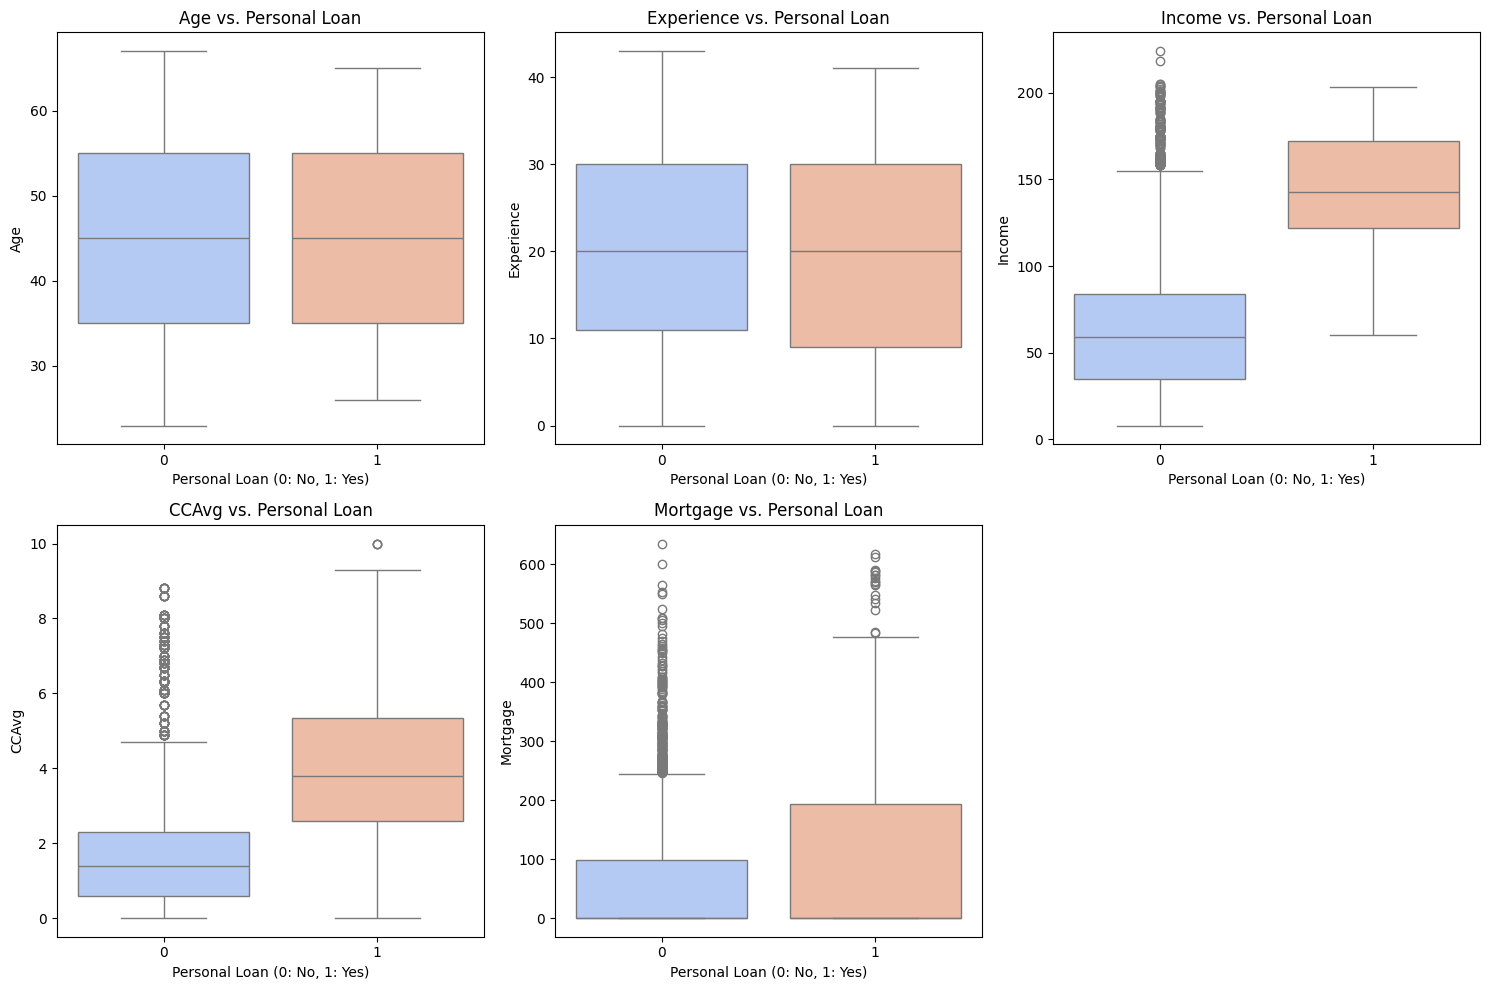

In [100]:
# Box plots to visualize distribution of numerical features with respect to Personal Loan approval
print("--- Generating Box Plots of Numerical Features vs. Personal Loan ---")

numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Personal Loan', y=col, data=df, palette='coolwarm', hue='Personal Loan', legend=False)
    plt.title(f'{col} vs. Personal Loan')
    plt.xlabel('Personal Loan (0: No, 1: Yes)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

--- Generating Pair Plot for Key Numerical Features vs. Personal Loan ---


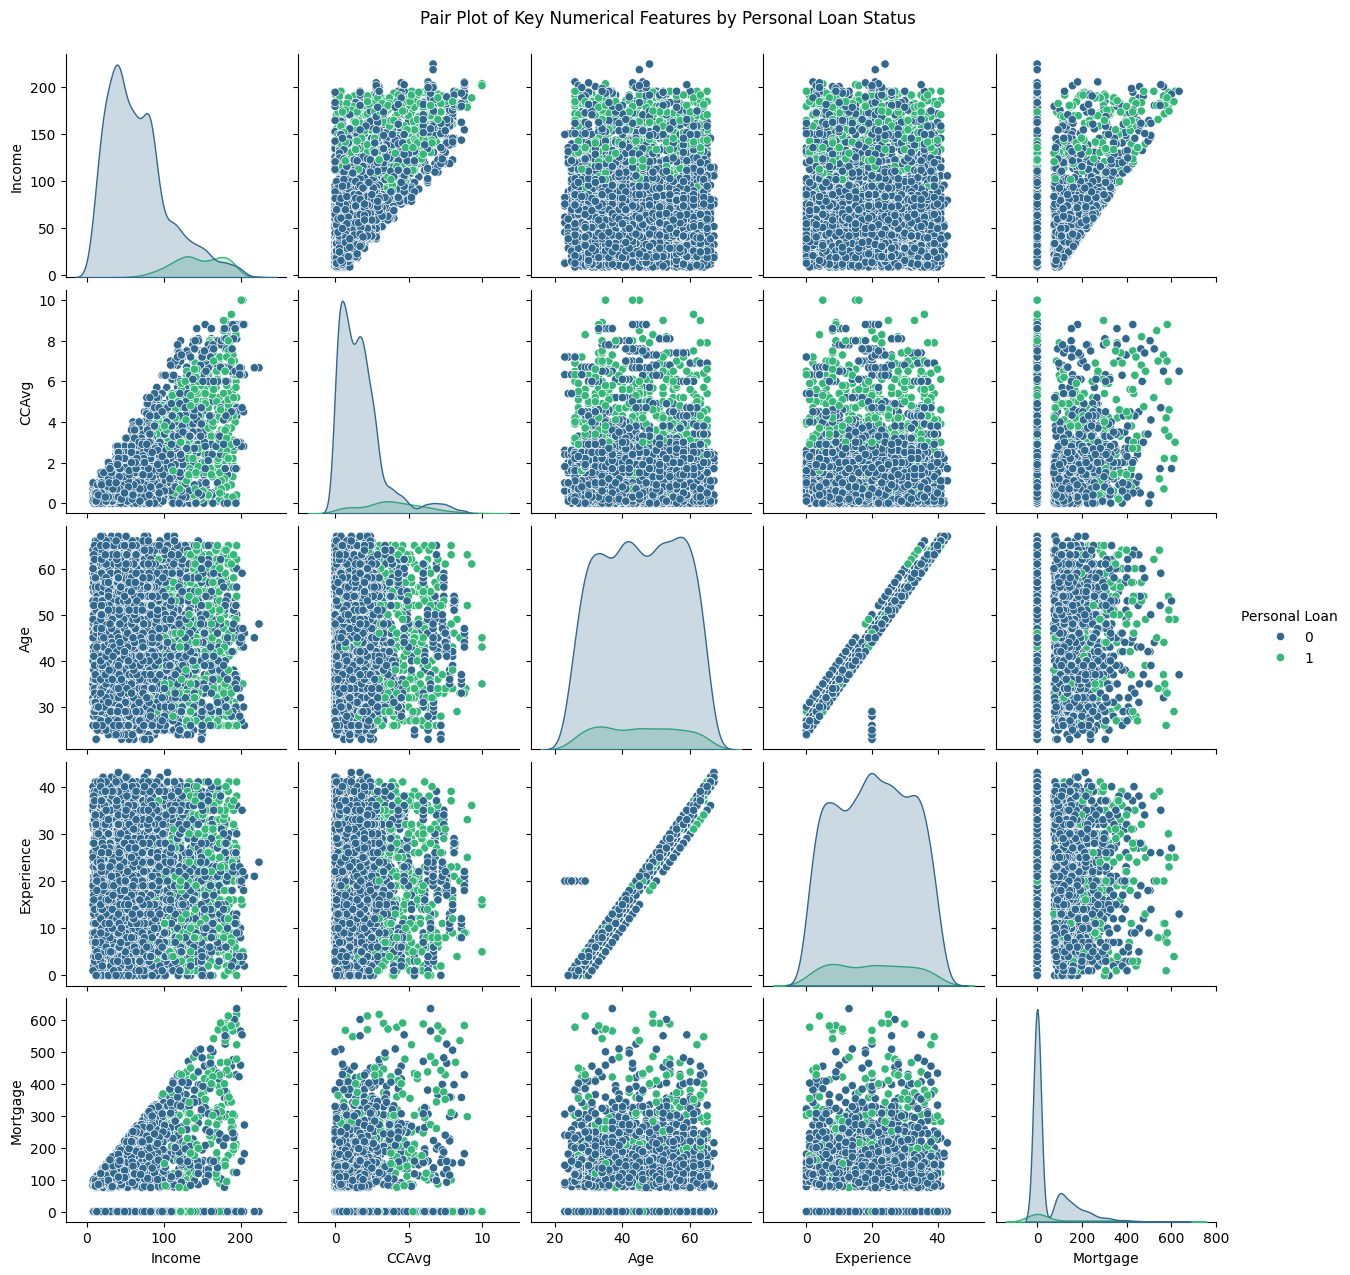

In [101]:
print("--- Generating Pair Plot for Key Numerical Features vs. Personal Loan ---")

# Select the most influential numerical features for the pair plot
key_numerical_features = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage', 'Personal Loan']

# Create a Pair Plot, colored by 'Personal Loan'
sns.pairplot(df[key_numerical_features], hue='Personal Loan', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Key Numerical Features by Personal Loan Status', y=1.02) # Adjust title position
plt.show()

--- Generating Violin Plots for Top Numerical Features vs. Personal Loan ---


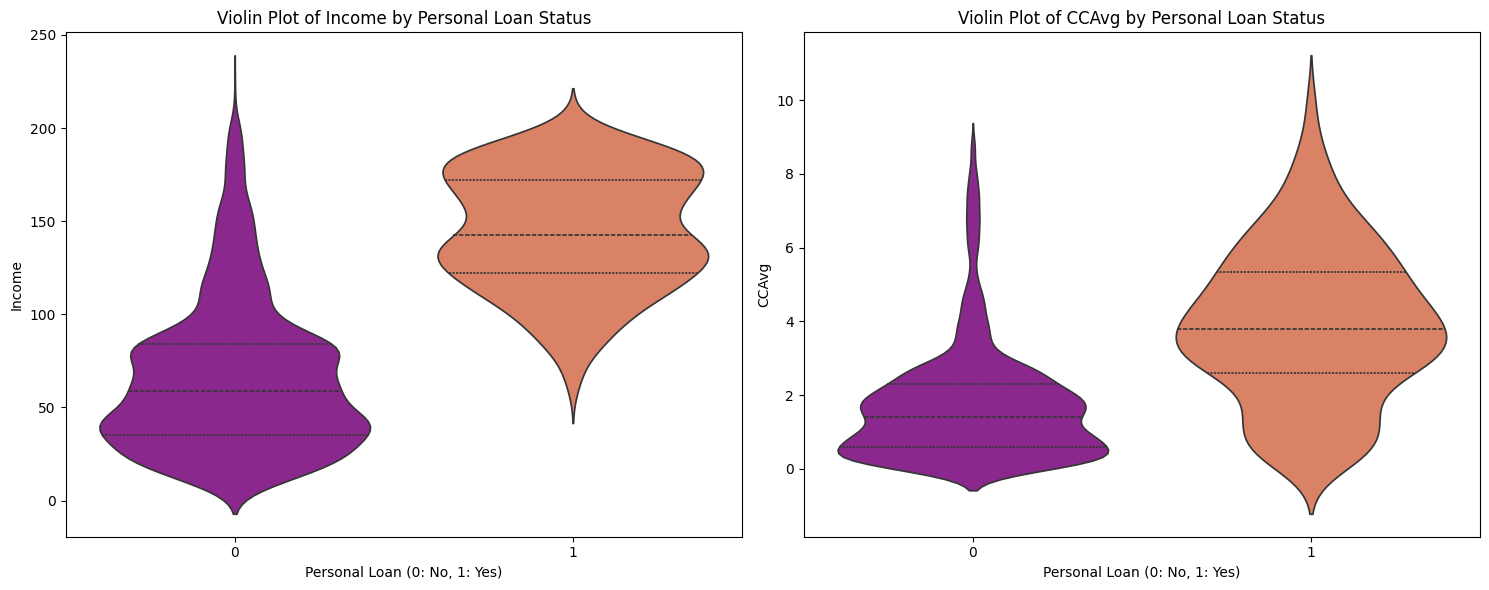

In [102]:
# Violin plots to show distribution and density of important numerical features by Personal Loan status
print("--- Generating Violin Plots for Top Numerical Features vs. Personal Loan ---")

top_numerical_features = ['Income', 'CCAvg']

plt.figure(figsize=(15, 6))
for i, col in enumerate(top_numerical_features):
    plt.subplot(1, 2, i + 1)
    sns.violinplot(x='Personal Loan', y=col, data=df, palette='plasma', inner='quartile', hue='Personal Loan', legend=False)
    plt.title(f'Violin Plot of {col} by Personal Loan Status')
    plt.xlabel('Personal Loan (0: No, 1: Yes)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Generating visualizations for numerical features...


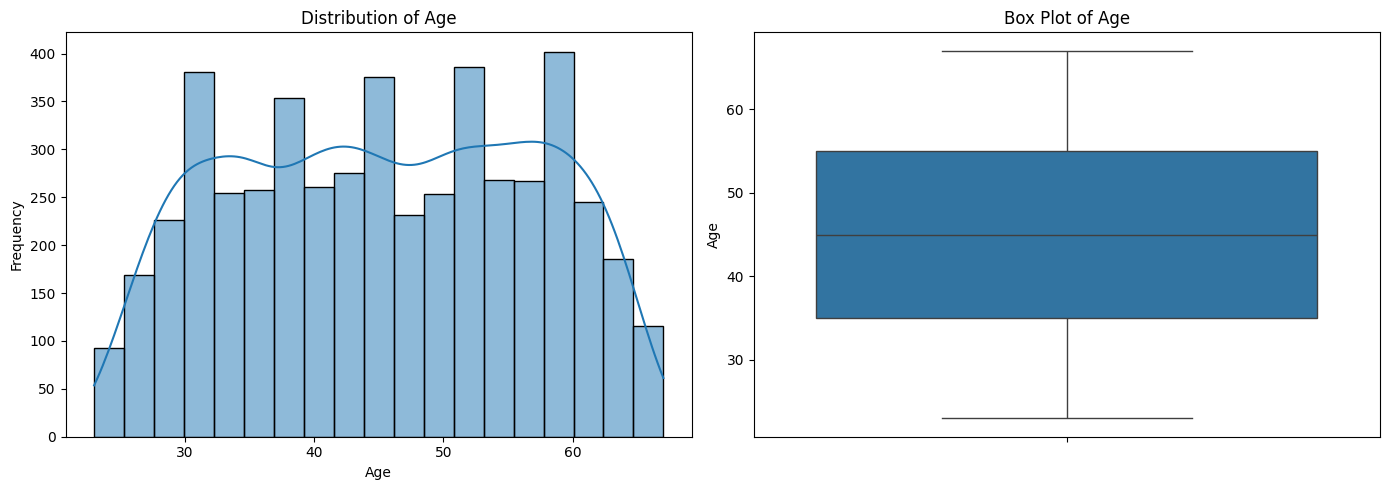

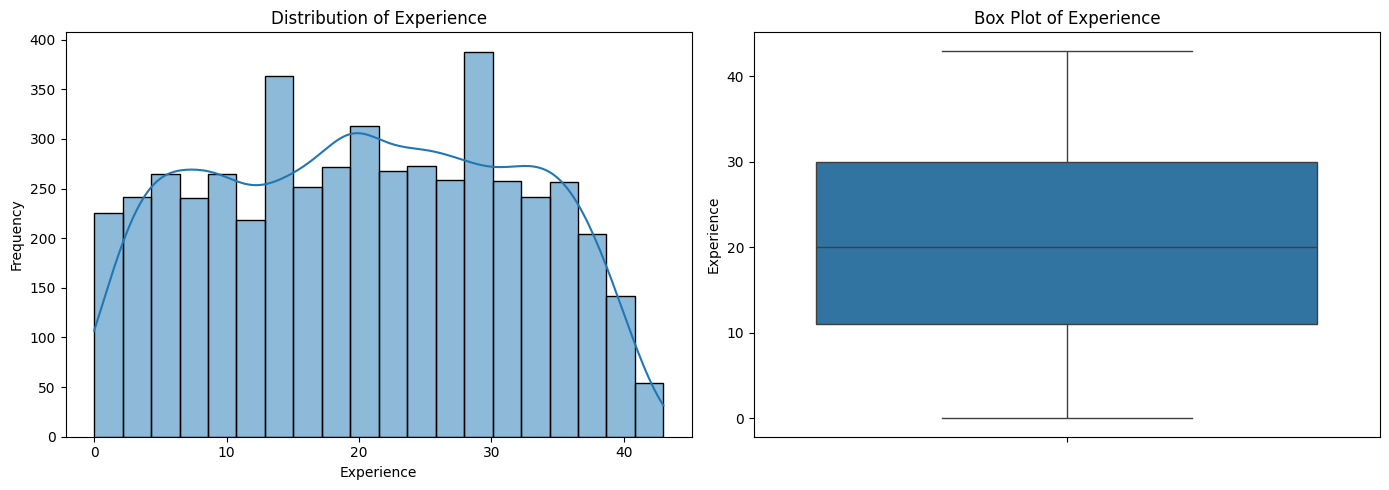

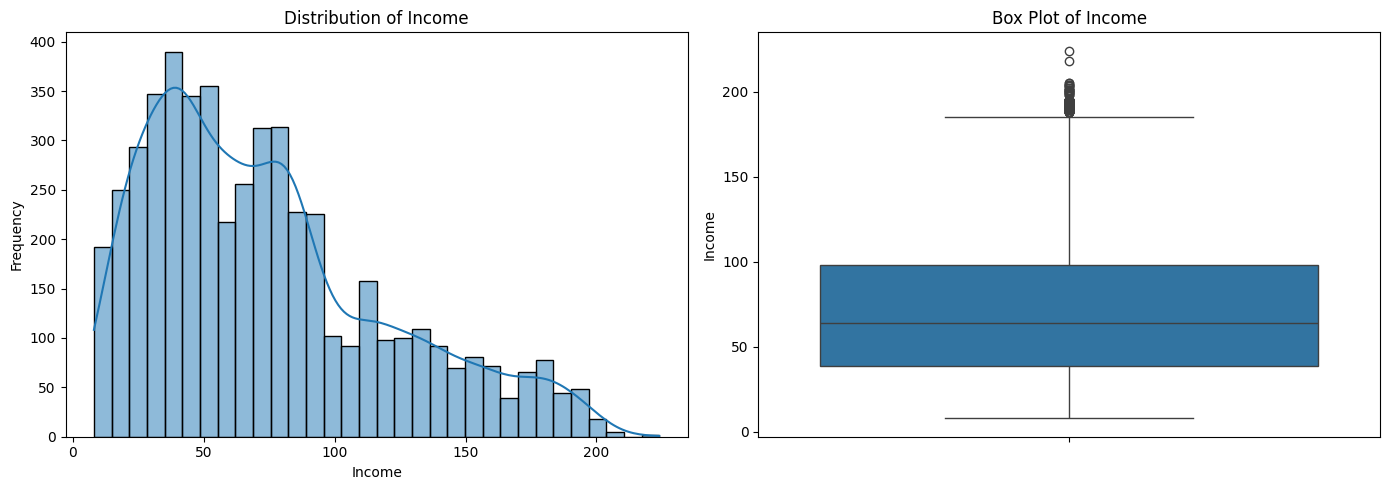

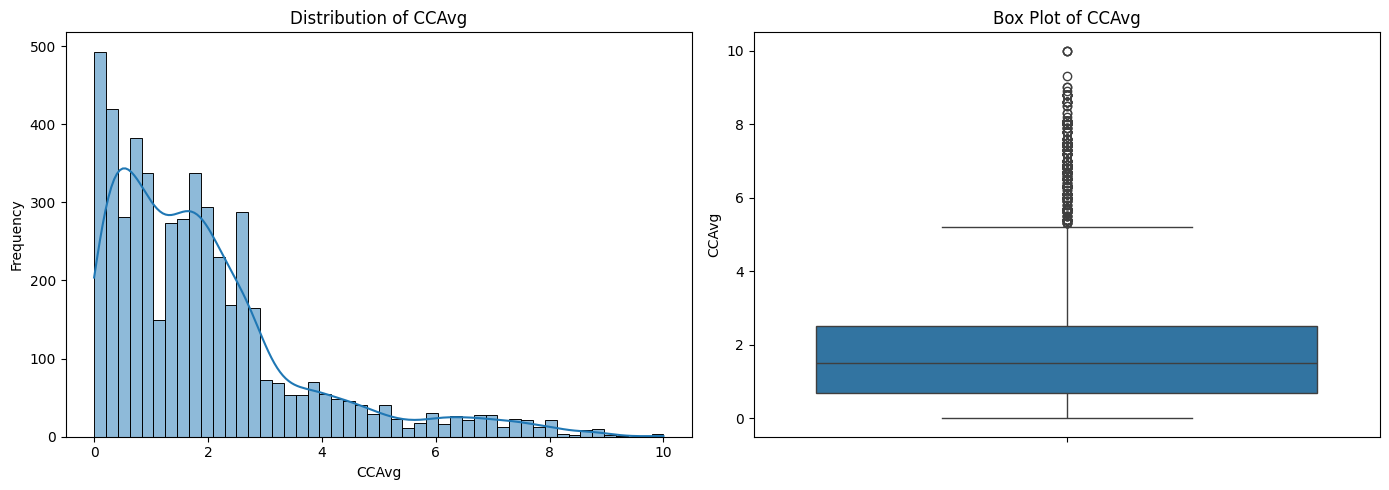

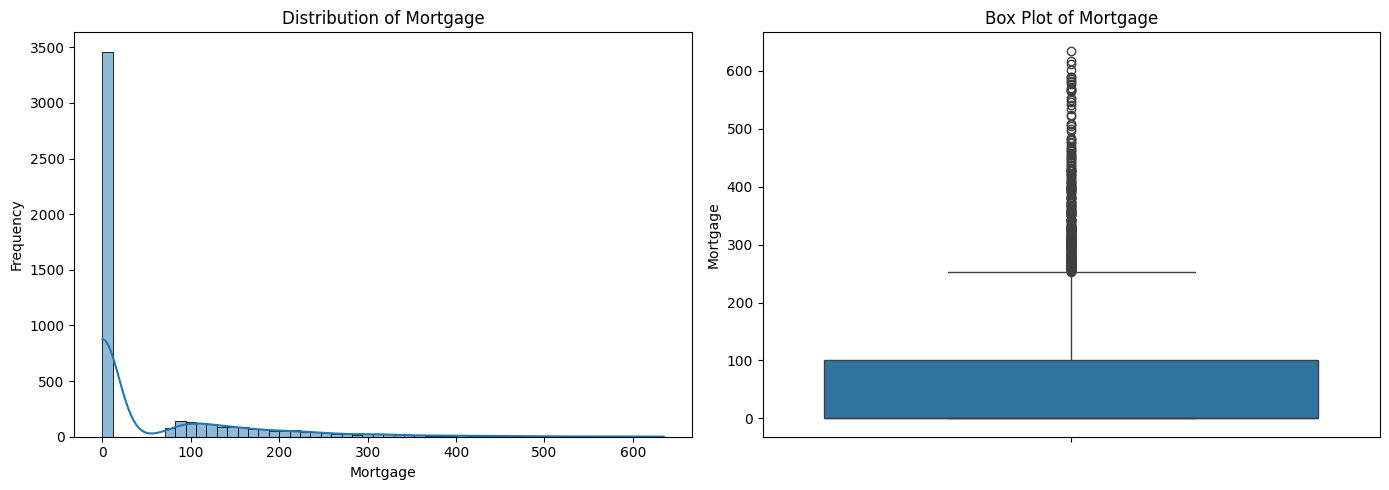


Generating visualizations for categorical/binary features...


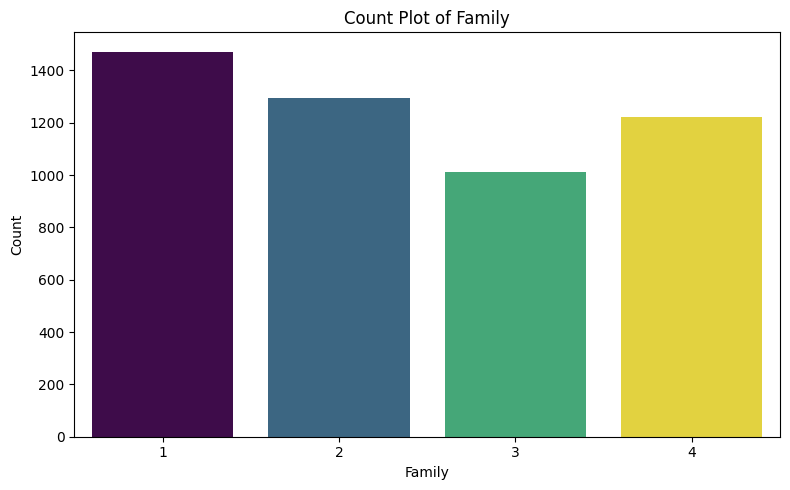

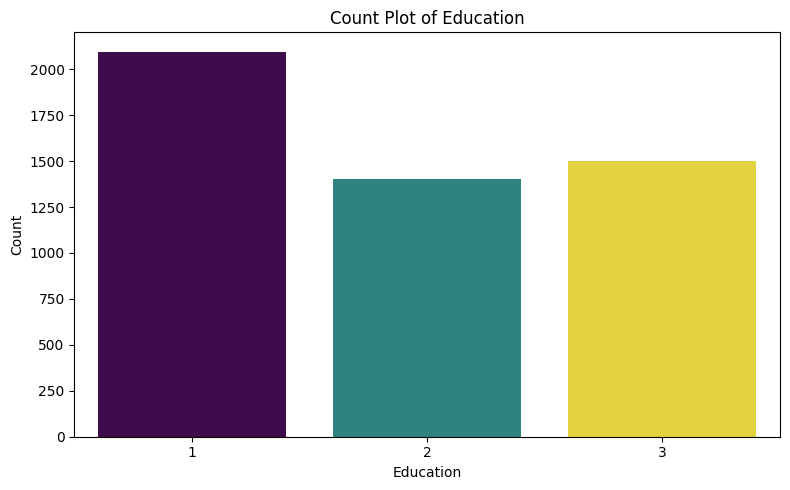

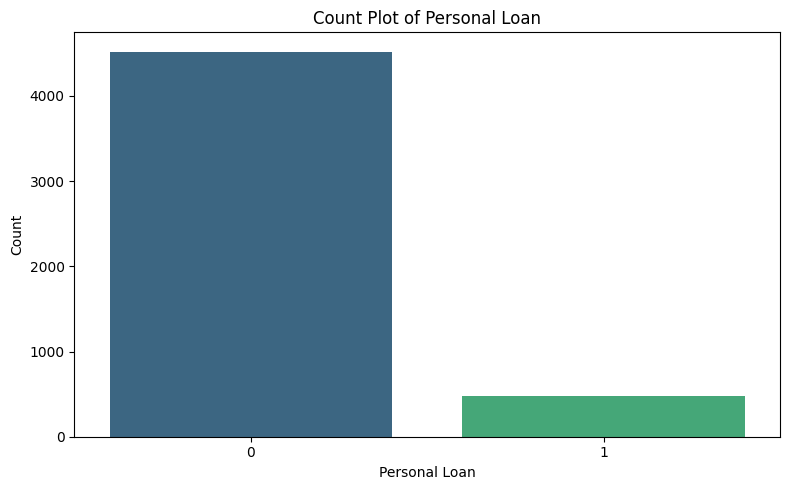

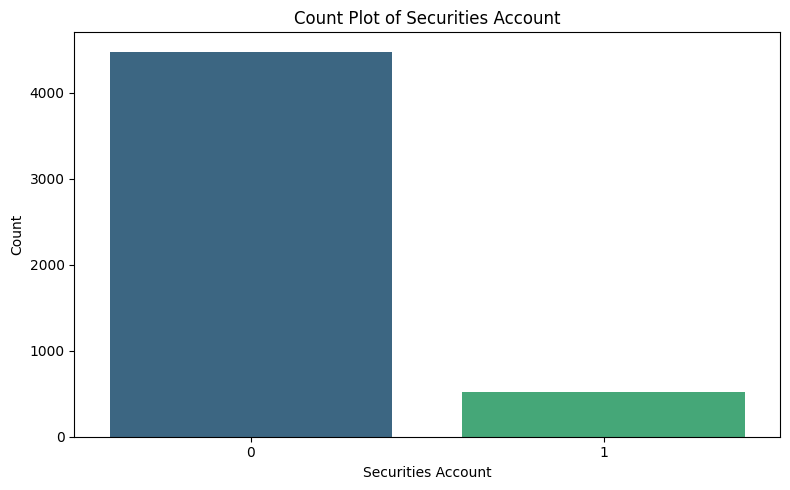

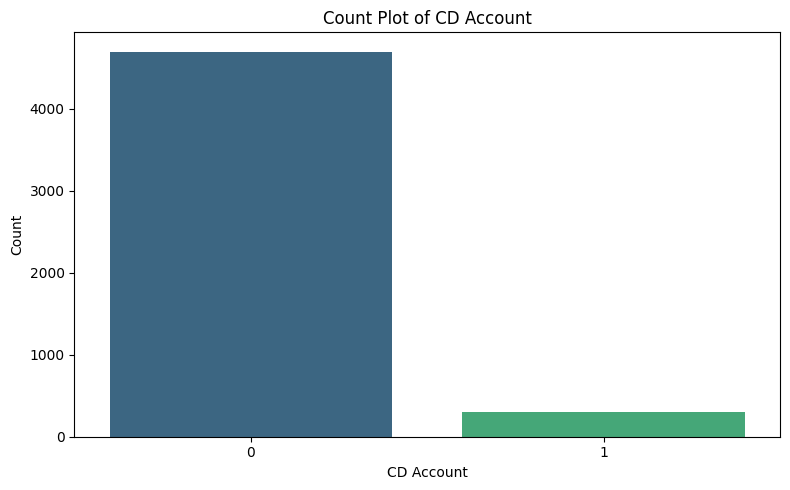

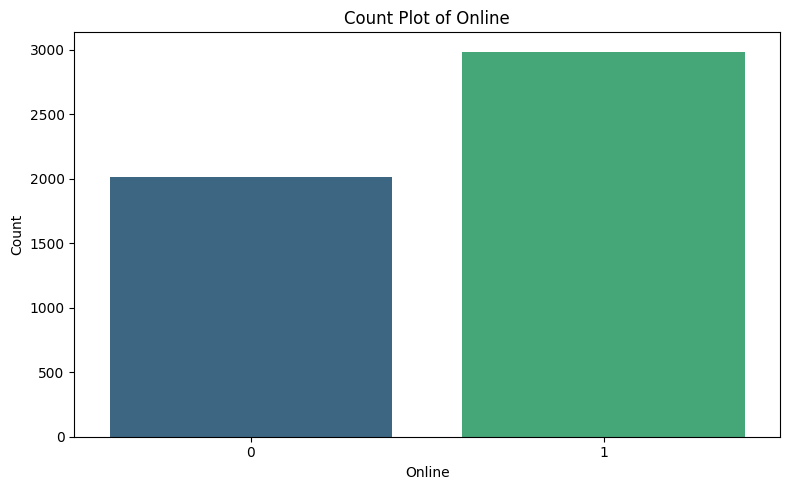

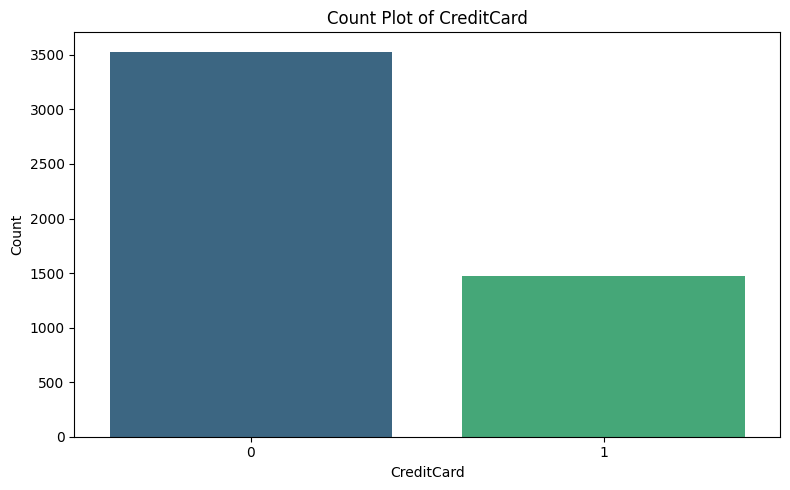

In [103]:
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
categorical_binary_features = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

# Visualize numerical features
print("Generating visualizations for numerical features...")
for col in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Box Plot
    sns.boxplot(y=df[col], ax=axes[1])
    axes[1].set_title(f'Box Plot of {col}')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()

# Visualize categorical/binary features
print("\nGenerating visualizations for categorical/binary features...")
for col in categorical_binary_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[col], palette='viridis', hue=df[col], legend=False)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## Visualize Feature Distributions Summary
# Numerical Features

Box Plots show clear separation between loan takers and non-takers:

Income and CCAvg are significantly higher for people who took personal loans.

Mortgage also shows slightly higher values among loan takers.

Age and Experience have similar distributions across both groups.

Violin Plots for Income and CCAvg:

Loan-approved users tend to have higher and more concentrated income.

CCAvg (average credit card spending) is skewed toward higher values among loan takers.

Pair Plot:

Reinforces that Income and CCAvg are strongly associated with loan status.

Clear cluster separations can be observed by these features.

# Categorical/Binary Features (Count Plots)

Family and Education:

Distribution is fairly balanced, but higher education levels may correlate with higher loan acceptance.

Loan-Related Features:

Personal Loan is highly imbalanced (many more non-loan takers).

Securities Account and CD Account: mostly zeros; few customers have them.

Online and CreditCard:

Online banking users and credit card holders are more prevalent among loan takers.

## Analyze Feature Relationships

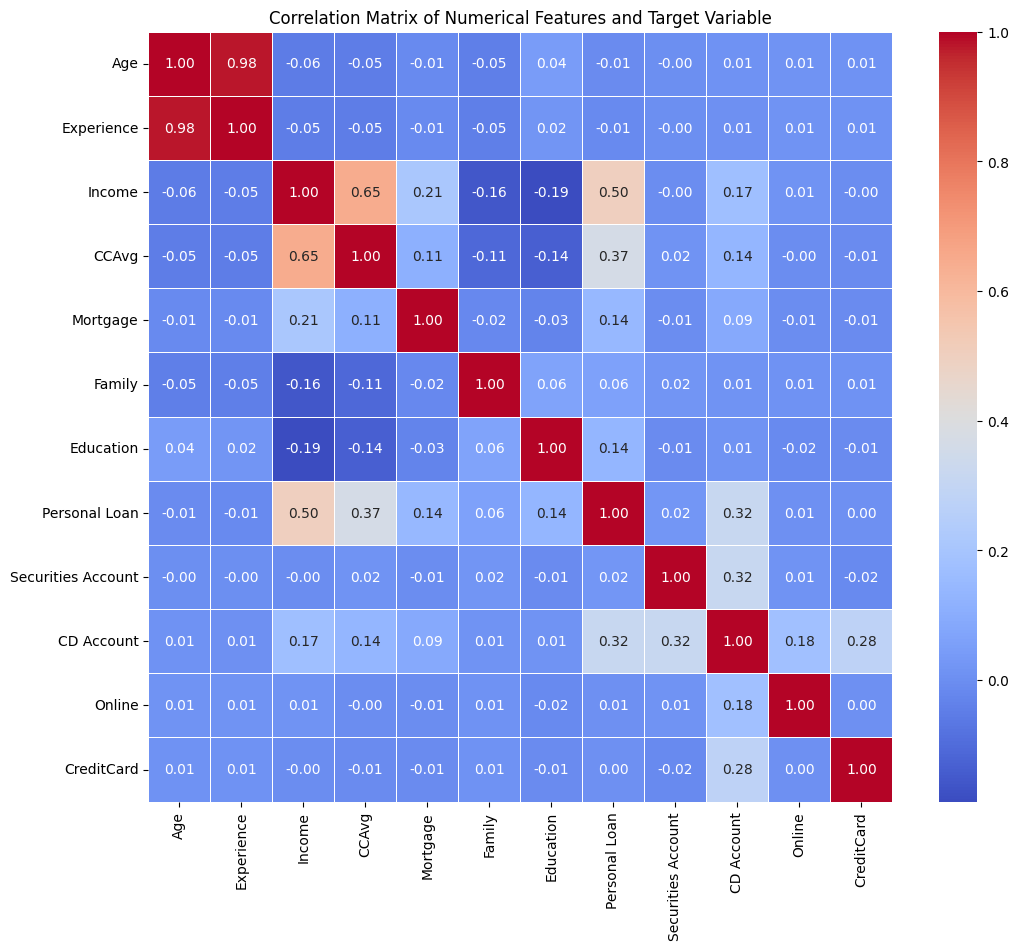

In [104]:
# Correlation heatmap to visualize relationships between features and the target variable
numerical_cols_for_correlation = [
    'Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family',
    'Education', 'Personal Loan', 'Securities Account',
    'CD Account', 'Online', 'CreditCard'
]

correlation_matrix = df[numerical_cols_for_correlation].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features and Target Variable')
plt.show()

### Correlation Analysis Summary

Based on the generated correlation heatmap, here are the key observations:

**Correlations with 'Personal Loan' (Target Variable):**

*   **Income (0.50)**: There is a strong positive correlation between 'Income' and 'Personal Loan'. This suggests that customers with higher incomes are significantly more likely to take a personal loan. This is the strongest predictor for 'Personal Loan'.
*   **CCAvg (0.37)**: 'CCAvg' (Average Credit Card Spending) also shows a moderate positive correlation with 'Personal Loan', indicating that customers who spend more on their credit cards tend to be more likely to take a personal loan.
*   **CD Account (0.29)**: Customers who have a CD Account show a moderate positive correlation with taking a personal loan.
*   **Education (0.14)**: There is a weak positive correlation between 'Education' level and 'Personal Loan'. Higher education levels (represented by larger numbers in our current encoding) might be slightly associated with a higher likelihood of taking a loan.
*   **Age (-0.00)** and **Experience (-0.00)**: Both 'Age' and 'Experience' have a negligible correlation with 'Personal Loan', suggesting they are not strong direct predictors for loan eligibility.
*   **Family (-0.06)**: 'Family' has a very weak negative correlation, implying little direct relationship.
*   **Mortgage (0.00)**, **Securities Account (-0.02)**, **Online (0.01)**, **CreditCard (-0.01)**: These features show very weak or negligible correlations with 'Personal Loan'.

**Multicollinearity Among Independent Variables:**

*   **Age and Experience (0.98)**: There is a very strong positive correlation between 'Age' and 'Experience'. This is expected as 'Experience' often increases with 'Age'. This high multicollinearity could be problematic for some linear models, but tree-based models like Random Forest are generally more robust to it. However, it's worth noting.
*   **Income and CCAvg (0.65)**: 'Income' and 'CCAvg' show a strong positive correlation, which is logical as higher income often leads to higher spending capacity on credit cards.

**Other Noteworthy Correlations:**

*   **Income and Mortgage (0.21)**: A weak positive correlation exists, suggesting that higher income individuals might be slightly more likely to have a mortgage.

**Conclusion for Modeling:**

'Income', 'CCAvg', and 'CD Account' appear to be the most influential features for predicting 'Personal Loan' based on correlation. The high correlation between 'Age' and 'Experience' should be considered, but for Random Forest, it might not require immediate action like dropping one of them.

## Preprocessing and Feature Engineering

In [108]:
# Drop irrelevant or identifier columns to clean the dataset
df = df.drop(['ID', 'ZIP Code'], axis=1)

print("Dropped 'ID' and 'ZIP Code' columns.")
print("Updated DataFrame head:")
print(df.head())

Dropped 'ID' and 'ZIP Code' columns.
Updated DataFrame head:
   Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25         1.0      49       4    1.6          1         0              0   
1   45        19.0      34       3    1.5          1         0              0   
2   39        15.0      11       1    1.0          1         0              0   
3   35         9.0     100       1    2.7          2         0              0   
4   35         8.0      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  


In [109]:
# Apply one-hot encoding to categorical columns (drop_first=True to avoid multicollinearity)
categorical_cols_for_ohe = ['Family', 'Education']
df_processed = pd.get_dummies(df, columns=categorical_cols_for_ohe, drop_first=True, dtype=int)

print("DataFrame head after one-hot encoding:")
print(df_processed.head())
print("\nShape of DataFrame after one-hot encoding:", df_processed.shape)

DataFrame head after one-hot encoding:
   Age  Experience  Income  CCAvg  Mortgage  Personal Loan  \
0   25         1.0      49    1.6         0              0   
1   45        19.0      34    1.5         0              0   
2   39        15.0      11    1.0         0              0   
3   35         9.0     100    2.7         0              0   
4   35         8.0      45    1.0         0              0   

   Securities Account  CD Account  Online  CreditCard  Family_2  Family_3  \
0                   1           0       0           0         0         0   
1                   1           0       0           0         0         1   
2                   0           0       0           0         0         0   
3                   0           0       0           0         0         0   
4                   0           0       0           1         0         0   

   Family_4  Education_2  Education_3  
0         1            0            0  
1         0            0            0  
2    

In [110]:
# Separate features and target variable
X = df_processed.drop('Personal Loan', axis=1)
y = df_processed['Personal Loan']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (5000, 14)
Shape of target (y): (5000,)


## Split Data into Training and Testing Sets

In [114]:
# Split the dataset into training and testing sets with stratification on the target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4000, 14)
Shape of X_test: (1000, 14)
Shape of y_train: (4000,)
Shape of y_test: (1000,)


## Feature Scaling

In [115]:
# Standardize numerical features in training and testing sets using StandardScaler
numerical_cols_for_scaling = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

scaler = StandardScaler()
X_train[numerical_cols_for_scaling] = scaler.fit_transform(X_train[numerical_cols_for_scaling])
X_test[numerical_cols_for_scaling] = scaler.transform(X_test[numerical_cols_for_scaling])

print("X_train head after scaling numerical features:")
print(X_train.head())

print("\nX_test head after scaling numerical features:")
print(X_test.head())

X_train head after scaling numerical features:
           Age  Experience    Income     CCAvg  Mortgage  Securities Account  \
408   1.268346    1.380536  0.335098  0.505071 -0.553909                   0   
3737 -0.124436   -0.124425 -0.938772 -0.817714 -0.553909                   0   
3889 -1.691316   -1.806440 -1.176273 -1.047763  0.643609                   0   
568  -0.994925   -1.009696 -0.701271 -1.047763  1.039483                   0   
1041  0.920150    1.026427 -0.485361 -0.242590 -0.553909                   0   

      CD Account  Online  CreditCard  Family_2  Family_3  Family_4  \
408            0       1           0         1         0         0   
3737           0       1           0         0         0         0   
3889           0       1           0         0         0         0   
568            0       1           1         1         0         0   
1041           0       0           0         0         0         1   

      Education_2  Education_3  
408             0 

## Train Random Forest Classifier with Hyperparameter Tuning (GridSearchCV)

In [116]:
# Perform hyperparameter tuning using GridSearchCV on a Random Forest classifier

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

print("Starting GridSearchCV for Random Forest Classifier...")
grid_search_rf.fit(X_train, y_train)
print("GridSearchCV for Random Forest Classifier completed.")

Starting GridSearchCV for Random Forest Classifier...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV for Random Forest Classifier completed.


In [117]:
# Display the best parameters and best ROC-AUC score from GridSearchCV

print("\nBest parameters found by GridSearchCV:")
print(grid_search_rf.best_params_)

print("\nBest ROC-AUC score on the training set:")
print(grid_search_rf.best_score_)


Best parameters found by GridSearchCV:
{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}

Best ROC-AUC score on the training set:
0.996725723323932


## Model Evaluation

Random Forest Classifier Evaluation Metrics:
Accuracy: 0.9930
Precision: 0.9785
Recall: 0.9479
F1-Score: 0.9630
ROC-AUC: 0.9991


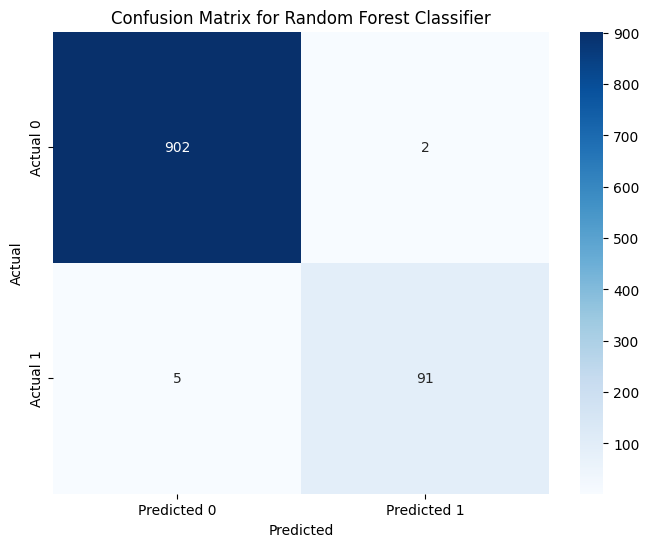

In [118]:
# Get the best Random Forest model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred_best_rf = best_rf_model.predict(X_test)
y_proba_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model using common classification metrics
accuracy_rf = accuracy_score(y_test, y_pred_best_rf)
precision_rf = precision_score(y_test, y_pred_best_rf)
recall_rf = recall_score(y_test, y_pred_best_rf)
f1_rf = f1_score(y_test, y_pred_best_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_best_rf)

print("Random Forest Classifier Evaluation Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")

# Create and visualize the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_best_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

--- Generating ROC Curve for Tuned Random Forest Model ---


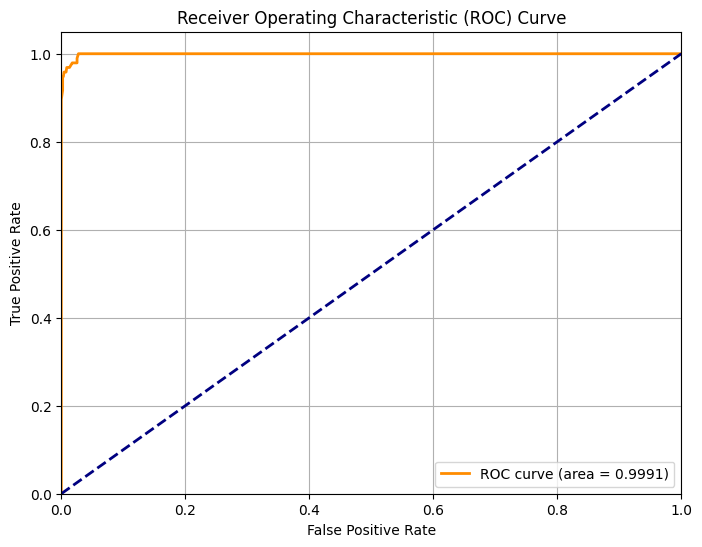

In [119]:
print("--- Generating ROC Curve for Tuned Random Forest Model ---")

# Get the best Random Forest model from Grid Search
best_rf_model = grid_search_rf.best_estimator_

# Predict probabilities on the test set
y_proba_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best_rf)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Feature Importance Analysis

In [120]:
# Get feature importances from the trained Random Forest model
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to hold feature names and their corresponding importances
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 most important features:")
print(features_df.head(10))

Top 10 most important features:
        Feature  Importance
2        Income    0.325328
3         CCAvg    0.171184
12  Education_2    0.083510
13  Education_3    0.082601
6    CD Account    0.062346
11     Family_4    0.050505
10     Family_3    0.048813
0           Age    0.048372
1    Experience    0.045468
4      Mortgage    0.044286


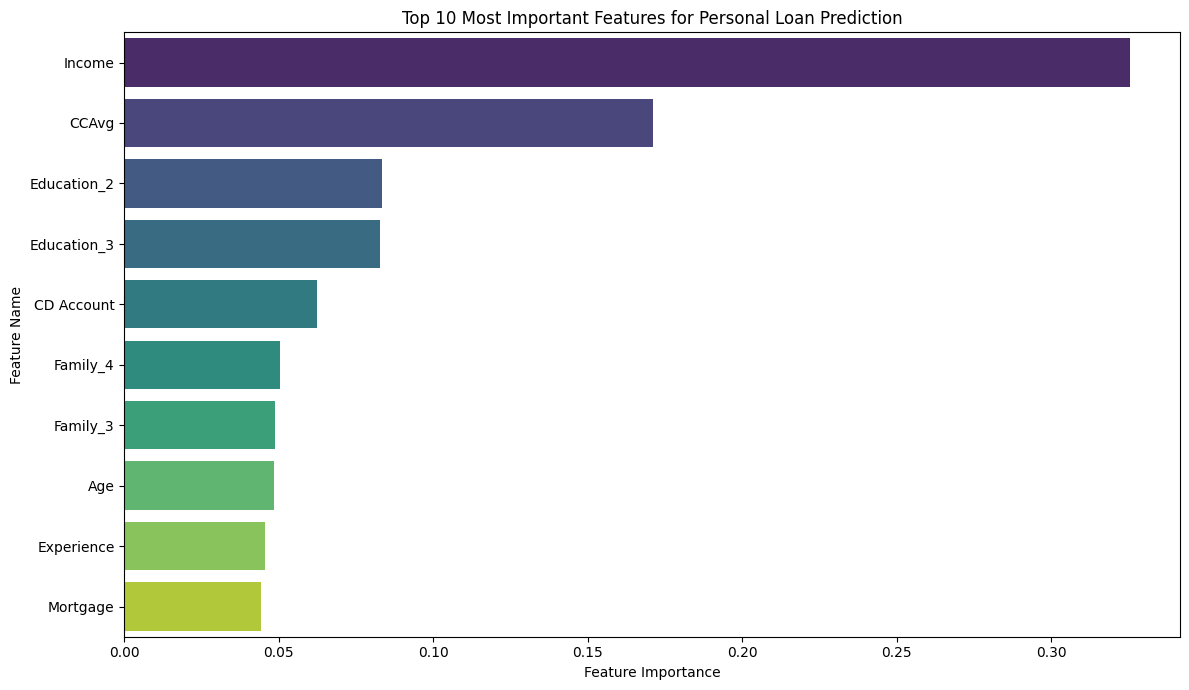

In [121]:
# Plot top 10 most important features using a horizontal bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis', hue='Feature', legend=False)
plt.title('Top 10 Most Important Features for Personal Loan Prediction')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


### Feature Importance Analysis Summary

1.  **Income (Importance: ~0.325)**: This is by far the most significant predictor. Higher income individuals are much more likely to be eligible for and take a personal loan. This is intuitive, as banks assess loan repayment capacity based on income.

2.  **CCAvg (Average Credit Card Spending) (Importance: ~0.171)**: This feature is also a strong predictor. Customers with higher average monthly credit card spending might indicate either higher financial activity, larger financial needs, or a different spending behavior that correlates with taking personal loans.

3.  **Education (Education_2 and Education_3) (Importance: ~0.083 and ~0.082 respectively)**: The one-hot encoded education levels (Education_2 and Education_3) collectively show significant importance. This suggests that the level of education attained by a customer plays a role in their likelihood of taking a personal loan, possibly indicating a correlation with higher earning potential or financial literacy.

4.  **CD Account (Importance: ~0.062)**: Whether a customer has a Certificate of Deposit (CD) Account is a notable predictor. Customers with a CD Account might represent a segment with more diversified financial holdings or a certain financial profile that makes them more prone to taking personal loans.

5.  **Family (Family_3 and Family_4) (Importance: ~0.049 and ~0.051 respectively)**: The number of family members, particularly for larger families, appears to influence loan eligibility. Larger families might have greater financial needs, making them more likely to seek personal loans.

6.  **Age (Importance: ~0.048)** and **Experience (Importance: ~0.045)**: Although highly correlated with each other, both Age and Experience still contribute to the model's predictive power. While their direct correlation with 'Personal Loan' was weak, their interaction with other features or their non-linear relationship within the Random Forest model allows them to be somewhat important.

7.  **Mortgage (Importance: ~0.044)**: The presence and amount of a mortgage also hold some importance, though less than income or CCAvg. This could indicate aspects of financial stability or existing debt obligations that factor into loan decisions.

**Insights:**

The model strongly emphasizes financial attributes such as `Income` and `CCAvg`, which aligns with typical banking criteria for loan approvals. Demographic features like `Education` and `Family` also play a significant role, reflecting different financial needs or stability levels. Features like `Securities Account`, `Online`, and `CreditCard` (the binary flag for having a credit card from the bank) are less important, suggesting they have less direct influence on personal loan eligibility compared to the top features.

## Summary:

### Q&A

**1. What is the definitive conclusion on the model's performance?**
The Random Forest Classifier achieved exceptionally high performance in predicting personal loan eligibility. On the unseen test set, the model yielded an ROC-AUC of 0.9991, an Accuracy of 0.9930, a Precision of 0.9785, a Recall of 0.9479, and an F1-Score of 0.9630. These metrics indicate a highly effective and robust model that accurately distinguishes between customers who will and will not take a personal loan.

**2. Is there any discussion regarding overfitting?**
The model does not show signs of significant overfitting. The ROC-AUC score on the training set during 5-fold cross-validation was approximately 0.9967, which is very close to the ROC-AUC of 0.9991 observed on the unseen test set. This consistency between training and testing performance, coupled with the use of cross-validation during hyperparameter tuning, suggests that the model generalizes well to new, unseen data.

### Data Analysis Key Findings

*   The dataset contains 5000 records and 14 columns, with no missing values.
*   Anomalous negative 'Experience' values were identified and corrected by replacing them with the median of positive 'Experience' values (20.0).
*   The target variable, 'Personal Loan', shows significant class imbalance, with only 9.6% of customers having taken a personal loan.
*   'ID' and 'ZIP Code' columns were identified as identifiers and dropped as they do not contribute to predictive power.
*   Correlation analysis revealed that 'Income' (0.50), 'CCAvg' (0.37), and 'CD Account' (0.29) have the strongest positive correlations with 'Personal Loan'.
*   A very strong positive correlation (0.98) was observed between 'Age' and 'Experience'.
*   Categorical features 'Family' and 'Education' were one-hot encoded.
*   Numerical features were scaled using `StandardScaler`.
*   A Random Forest Classifier was trained with `GridSearchCV` to optimize for ROC-AUC, identifying `n_estimators=100`, `max_features='sqrt'`, and `min_samples_leaf=1` as the best hyperparameters.
*   The top three most important features for predicting personal loan eligibility were 'Income' (importance \~0.325), 'CCAvg' (importance \~0.171), and 'Education' levels (importance \~0.083 and \~0.082).
*   The confusion matrix on the test set showed only 2 False Positives and 5 False Negatives out of 1000 test samples, confirming the model's high accuracy and precision.

### Insights or Next Steps

*   The developed Random Forest model provides a highly accurate and reliable tool for predicting personal loan eligibility, which can significantly aid banks in targeted marketing and risk assessment.
*   Given the strong influence of 'Income', 'CCAvg', 'Education', and 'CD Account', the bank could further investigate customer segments defined by these attributes to refine product offerings or personalize outreach strategies.